In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
noise

array([-0.87670639, -0.20891258,  1.2565907 , ...,  1.97504947,
       -1.28744449,  0.46937259])

In [7]:
##y = mx + b
##b=5

In [8]:
y_true = (0.5 * x_data) + 5 + noise

In [10]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [11]:
y_df = pd.DataFrame(data=y_true,columns=["Y"])

In [12]:
y_df.head()

,Y
0,4.123294
1,4.791092
2,6.256601
3,3.969420
4,5.624570


In [13]:
my_data = pd.concat([x_df,y_df], axis=1)

In [14]:
my_data.head()

,X Data,Y
0,0.00000,4.123294
1,0.00001,4.791092
2,0.00002,6.256601
3,0.00003,3.969420
4,0.00004,5.624570


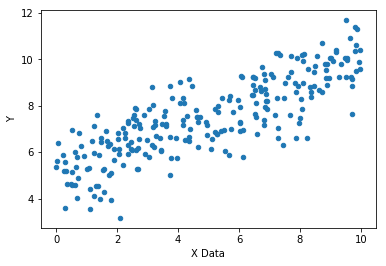

In [18]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [19]:
batch_size=8

In [22]:
m=tf.Variable(0.81)

In [23]:
b=tf.Variable(.17)

In [24]:
xph = tf.placeholder(tf.float32,[batch_size])

In [25]:
yph = tf.placeholder(tf.float32,[batch_size])

In [26]:
y_model = m * xph + b

In [27]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for _ in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict=feed)
    model_m,model_b = sess.run([m,b])
print(model_m,model_b)

0.5005087 4.9096136


In [34]:
y_hat = x_data*model_m+model_b

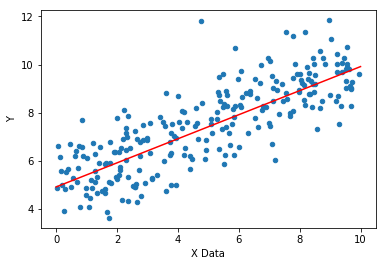

In [39]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data, y_hat,'r')